In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

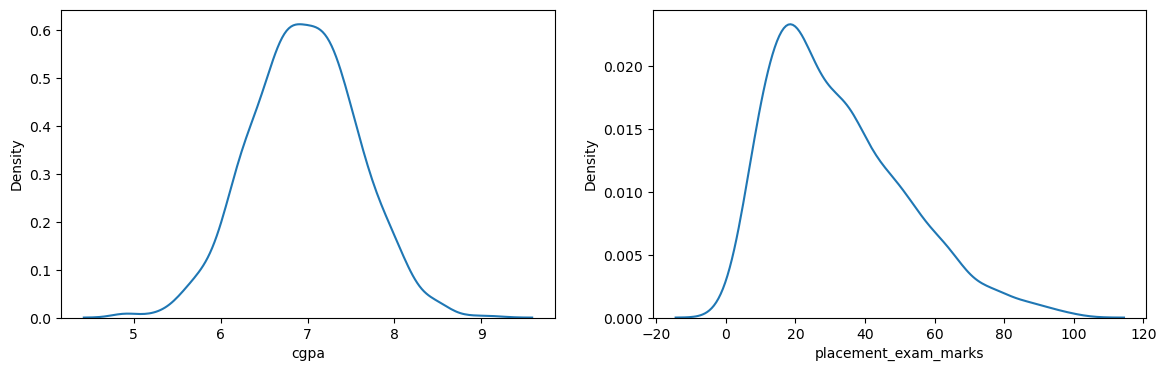

In [4]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['cgpa'])

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])

## As visualized above 'cgpa' column is normally distributed so we will use Z-Score method to remove outliers from the data

# **Trimming**

In [42]:
min_value = df['cgpa'].mean() - 3*df['cgpa'].std()
min_value

5.113546374602832

In [43]:
max_value = df['cgpa'].mean() + 3*df['cgpa'].std()
max_value

8.808933625397168

In [30]:
new_df = df[(df['cgpa'] > min_value) & (df['cgpa'] < max_value)]

In [31]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# **Capping**

In [57]:
df['cgpa'] = np.where(df['cgpa'] < min_value,
                      min_value,
                      np.where(df['cgpa'] > max_value,
                               max_value,
                               df['cgpa']))

In [58]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


## Now 'placement_exam_marks' column was skewed column so we would use IQR method to detect outlier

<Axes: >

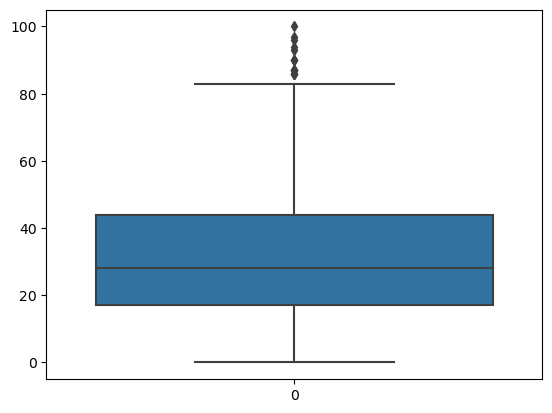

In [61]:
sns.boxplot(df['placement_exam_marks'])

In [62]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [65]:
Q1 = df['placement_exam_marks'].quantile(0.25)

In [66]:
Q2 = df['placement_exam_marks'].quantile(0.75)

In [67]:
IQR = Q2 - Q1

In [68]:
minimum = Q1 - 1.5*IQR
maximum = Q2 + 1.5*IQR

In [80]:
minimum

-23.5

In [81]:
maximum

84.5

## Trimming

In [75]:
marks_df = df[(df['placement_exam_marks'] > minimum) & (df['placement_exam_marks'] < maximum)]

In [76]:
marks_df.shape

(985, 3)

## Capping

In [77]:
df['placement_exam_marks'] = np.where(df['placement_exam_marks'] < minimum,
                                      minimum,
                                      np.where(df['placement_exam_marks'] > maximum,
                                               maximum,
                                               df['placement_exam_marks']))

In [78]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [79]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961499,32.136500,0.489000
std,0.612688,18.865419,0.500129
min,5.113546,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,8.808934,84.500000,1.000000


## Now the df is completly free from outliers as we have capped the outliers from both the columns.